# Normalizando Dados
## importando bibliotecas e lendo arquivo proncipal 1418 linas

In [54]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


data = pd.read_csv('imovel_limpo.csv')


In [55]:
dados = pd.DataFrame({
    'titulo': list(data.get('Titulo do imóvel')),
    'preco': list(data.get('Preço')),
    'quartos': list(data.get('Quartos')),
    'area': list(data.get('Área do imóvel')),
})
print('total:',len(dados))
dados = dados.dropna()
print('-nulos:',len(dados))

# --- Limpeza dos dados numéricos ---
dados['area'] = (
    dados['area']
    .astype(str)
    .str.replace('m²', '', regex=False)
    .str.replace(' ', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)
dados['preco'] = (
    dados['preco']
    .astype(str)
    .str.replace('R$', '', regex=False)
    .str.replace(' ', '', regex=False)
    .str.replace(',00', '', regex=False)
    .str.replace('.', '', regex=False)
    .astype(float)
)
dados.to_csv('polidos.csv')


total: 1417
-nulos: 1281


In [56]:
X = dados[['quartos', 'area']]
y = dados['preco']

In [57]:
colunas_numericas = ['quartos', 'area']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# --- Cria e treina o modelo ---
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

Coeficientes: [-974.31036253    0.98800288]
Intercepto: 15343.509228503193


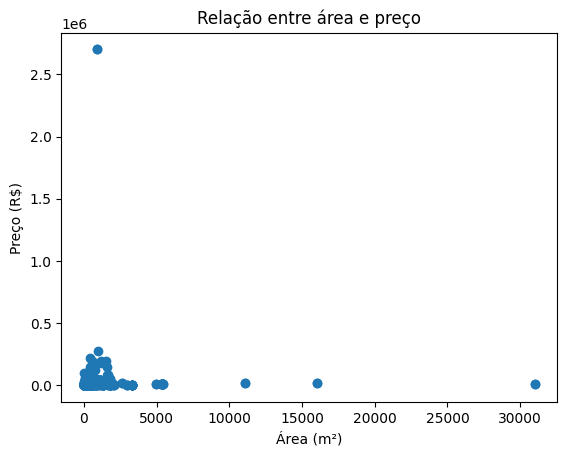

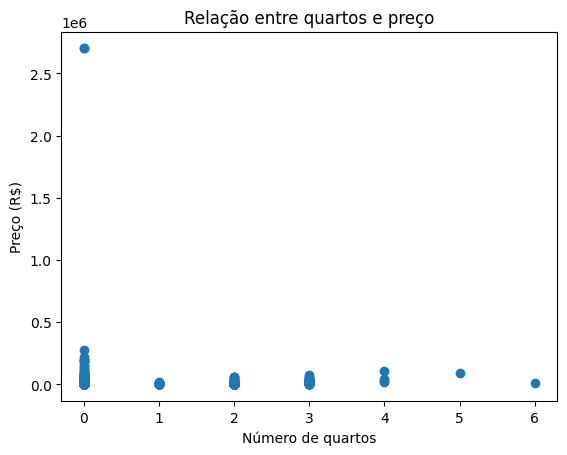

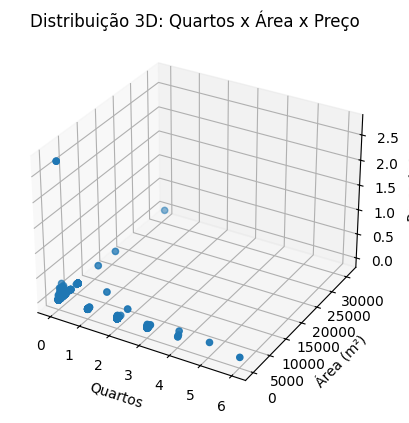

In [60]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def gerarGraficos(dados):
    plt.scatter(dados['area'], dados['preco'])
    plt.xlabel('Área (m²)')
    plt.ylabel('Preço (R$)')
    plt.title('Relação entre área e preço')
    plt.show()

    plt.scatter(dados['quartos'], dados['preco'])
    plt.xlabel('Número de quartos')
    plt.ylabel('Preço (R$)')
    plt.title('Relação entre quartos e preço')
    plt.show()


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dados['quartos'], dados['area'], dados['preco'])
    ax.set_xlabel('Quartos')
    ax.set_ylabel('Área (m²)')
    ax.set_zlabel('Preço (R$)')
    plt.title('Distribuição 3D: Quartos x Área x Preço')
    plt.show()


gerarGraficos(dados)

# retirada dos 0s

In [61]:
dados = dados[(dados['quartos'] != 0) & (dados['area'] != 0) & (dados['preco'] != 0)]
print('-0s:', len(dados))


-0s: 277


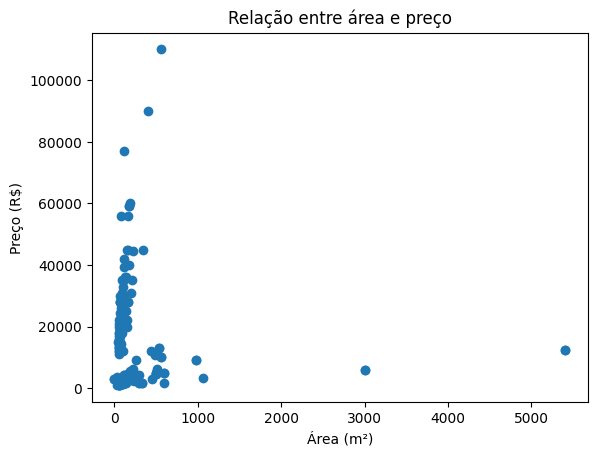

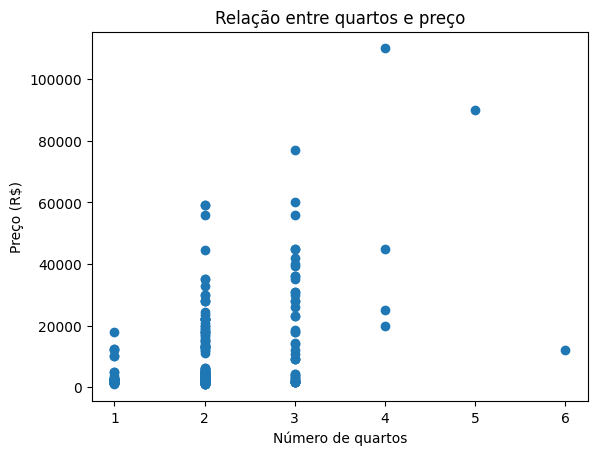

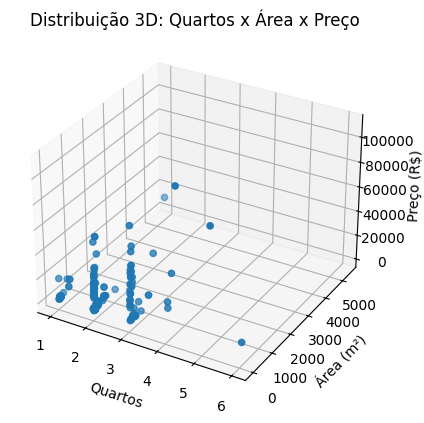

In [62]:

gerarGraficos(dados)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

def treinar(dados):
    X = dados[['quartos', 'area']]
    y = dados['preco']

    X_treino, X_teste, y_treino, y_teste = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    modelo = LinearRegression()
    modelo.fit(X_treino, y_treino)

    print("Coeficientes:", modelo.coef_)
    print("Intercepto:", modelo.intercept_)
    y_pred = modelo.predict(X_teste)    
    print(f"MAE: R$ {mean_absolute_error(y_teste, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_teste, y_pred):.2f}")
    print(f"R²: {r2_score(y_teste, y_pred):.2f}")

    try:
        quart = int(input('Quantos quartos? '))
        tam = int(input('Tamanho em metros quadrados? '))
    except ValueError:
        print("Digite apenas números inteiros!")
        return

    novo = pd.DataFrame({
        'quartos': [quart],
        'area': [tam],
    })

    preco_previsto = modelo.predict(novo)
    print(f"Preço estimado para imóvel com {quart} quartos e {tam} m²: R$ {preco_previsto[0]:.2f}")

    dados.to_csv('faltaltilayers.csv', index=False)

treinar(dados)


Coeficientes: [9.84067971e+03 1.72354289e+00]
Intercepto: -10479.875710850301
MAE: R$ 9706.09
MSE: 185722219.21
R²: 0.19


Preço estimado para imóvel com 2 quartos e 45 m²: R$ 9279.04


# Valores reduzidos

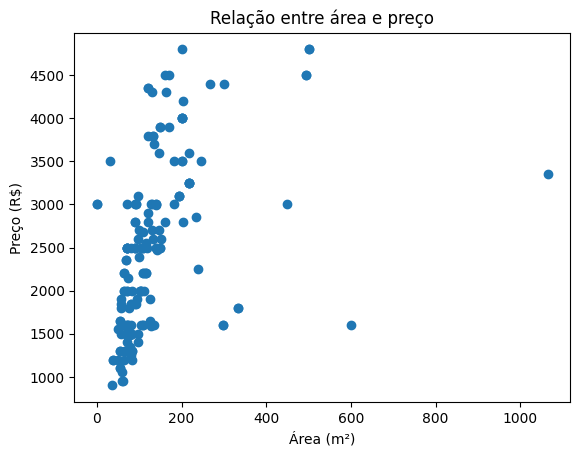

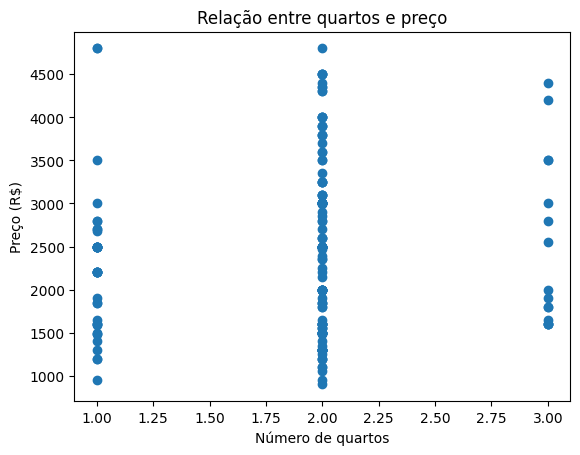

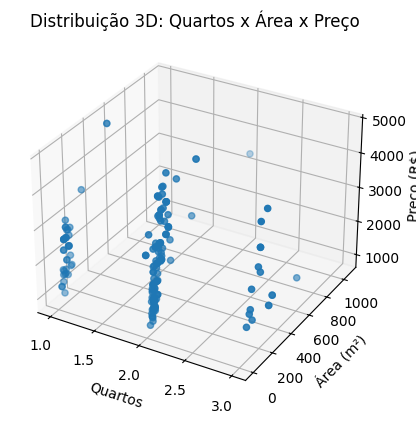

In [ ]:
dados = dados[dados['preco'] < 5000]

len(dados)
gerarGraficos(dados)

In [65]:
treinar(dados)

Coeficientes: [112.07468576   3.98203214]
Intercepto: 1711.7714560810787
MAE: R$ 639.64
MSE: 635750.75
R²: -0.14
Preço estimado para imóvel com 2 quartos e 45 m²: R$ 2115.11


In [66]:
dados.to_csv('end_table.csv')